# Импортируем библиотеки

In [ ]:
# импорт библиотек
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
data = pd.read_parquet('train_mfti.parquet', engine='pyarrow')

In [ ]:
df = data.copy()

* 1 show_vacancy - просмотр вакансии
* 2 preview_click_vacancy - клик по карточке вакансии
* 3 click_response - отклик со страницы вакансии
* 4 preview_click_response - отклик с карточки вакансии
* 5 click_favorite - добавление вакансии в избранное  со страницы вакансии
* 6 preview_click_favorite - добавление вакансии в избраное с карточки вакансии
* 7 click_contacts - клик на контакты со страницы вакансии
* 8 preview_click_contacts - клик на контакты из карточки вакансии
* 9 click_phone - клик на номер телефона, указанный в вакансии
* 10 preview_click_phone - клик на номер телефона из карточки вакансии

Жирным выделены искомые ""откликнется"" и ""позвонит"""

In [ ]:

# Приведение столбцов event_date и event_timestamp к типу datetime
df['event_date'] = pd.to_datetime(df['event_date'])
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s')

# Создание новых столбцов для каждого из признаков, содержащих информацию о дате и времени взаимодействия
df['year'] = df['event_date'].dt.year
df['month'] = df['event_date'].dt.month
df['day'] = df['event_date'].dt.day
df['hour'] = df['event_timestamp'].dt.hour
df['minute'] = df['event_timestamp'].dt.minute

# Создание новых столбцов для каждого уникального значения вакансии и идентификатора пользователя
# df['vacancy_id_'] = df['vacancy_id_'].astype('category').cat.codes
# df['cookie_id'] = df['cookie_id'].astype('category').cat.codes
# df['user_id'] = df['user_id'].astype('category').cat.codes
# df['event_type'] = df['event_type'].astype('category').cat.codes
# Вывод преобразованной таблицы
display(df.head())

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,year,month,day,hour,minute
0,2022-08-01,2022-08-01 03:03:46,129850,97990f1a021d4be19aa3f955b7eacab4,951f53de61764ea0b51317200a0dbbfc,show_vacancy,2022,8,1,3,3
1,2022-08-01,2022-08-01 18:07:35,108347,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,2022,8,1,18,7
2,2022-08-01,2022-08-01 17:58:15,109069,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,2022,8,1,17,58
3,2022-08-01,2022-08-01 17:58:42,171425,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,2022,8,1,17,58
4,2022-08-01,2022-08-01 17:28:49,252384,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,2022,8,1,17,28


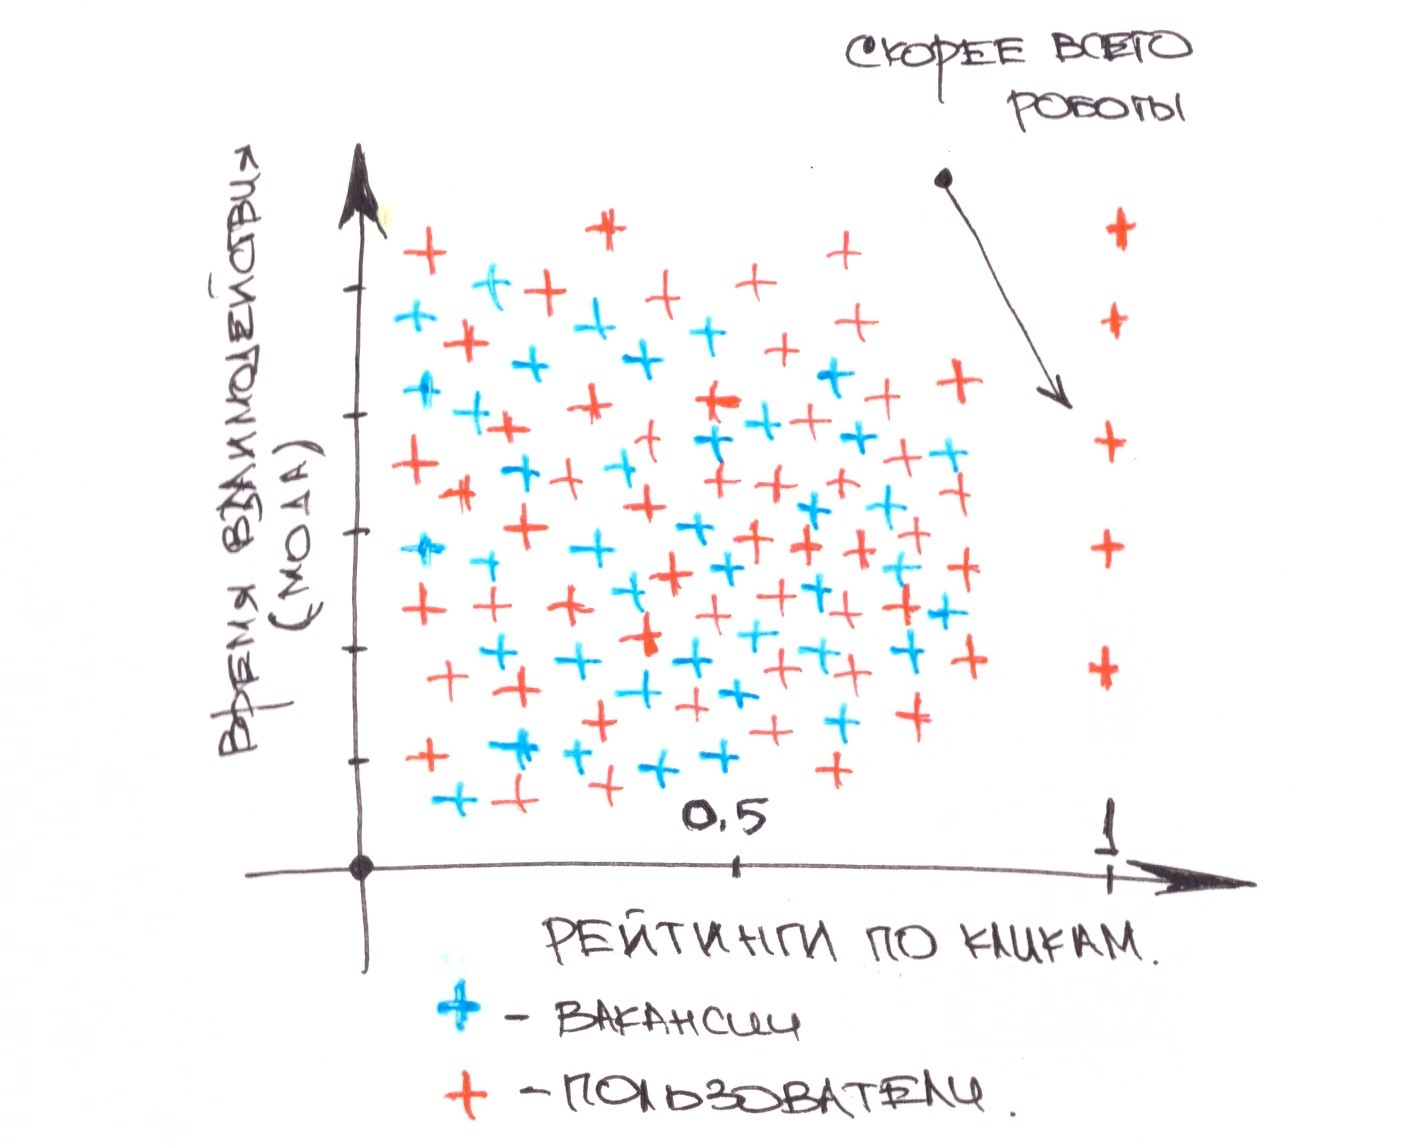

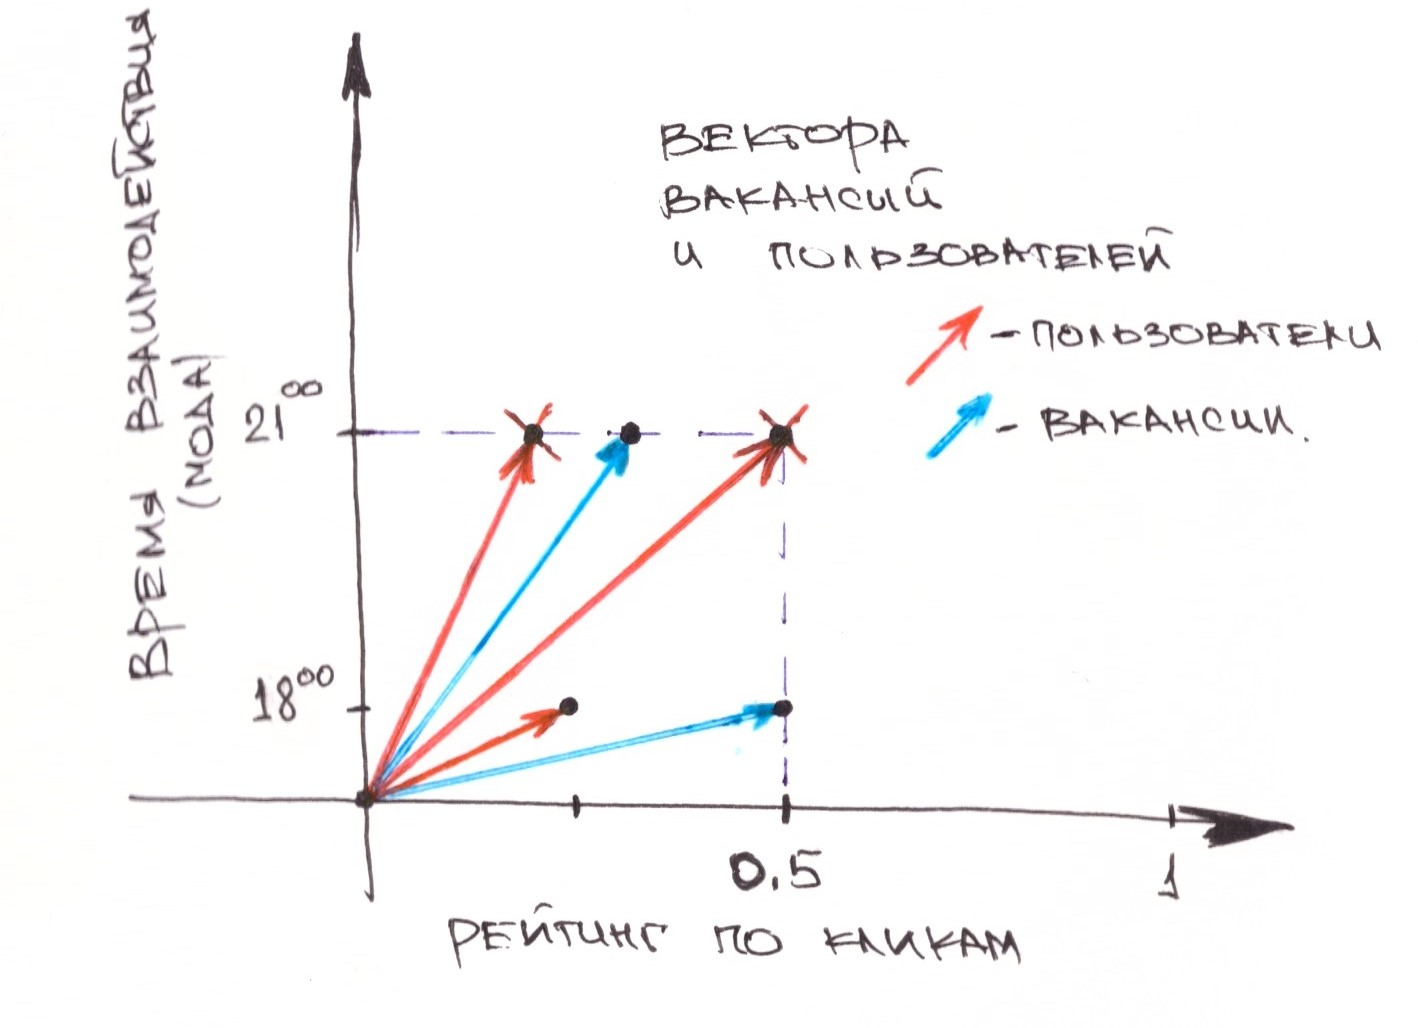

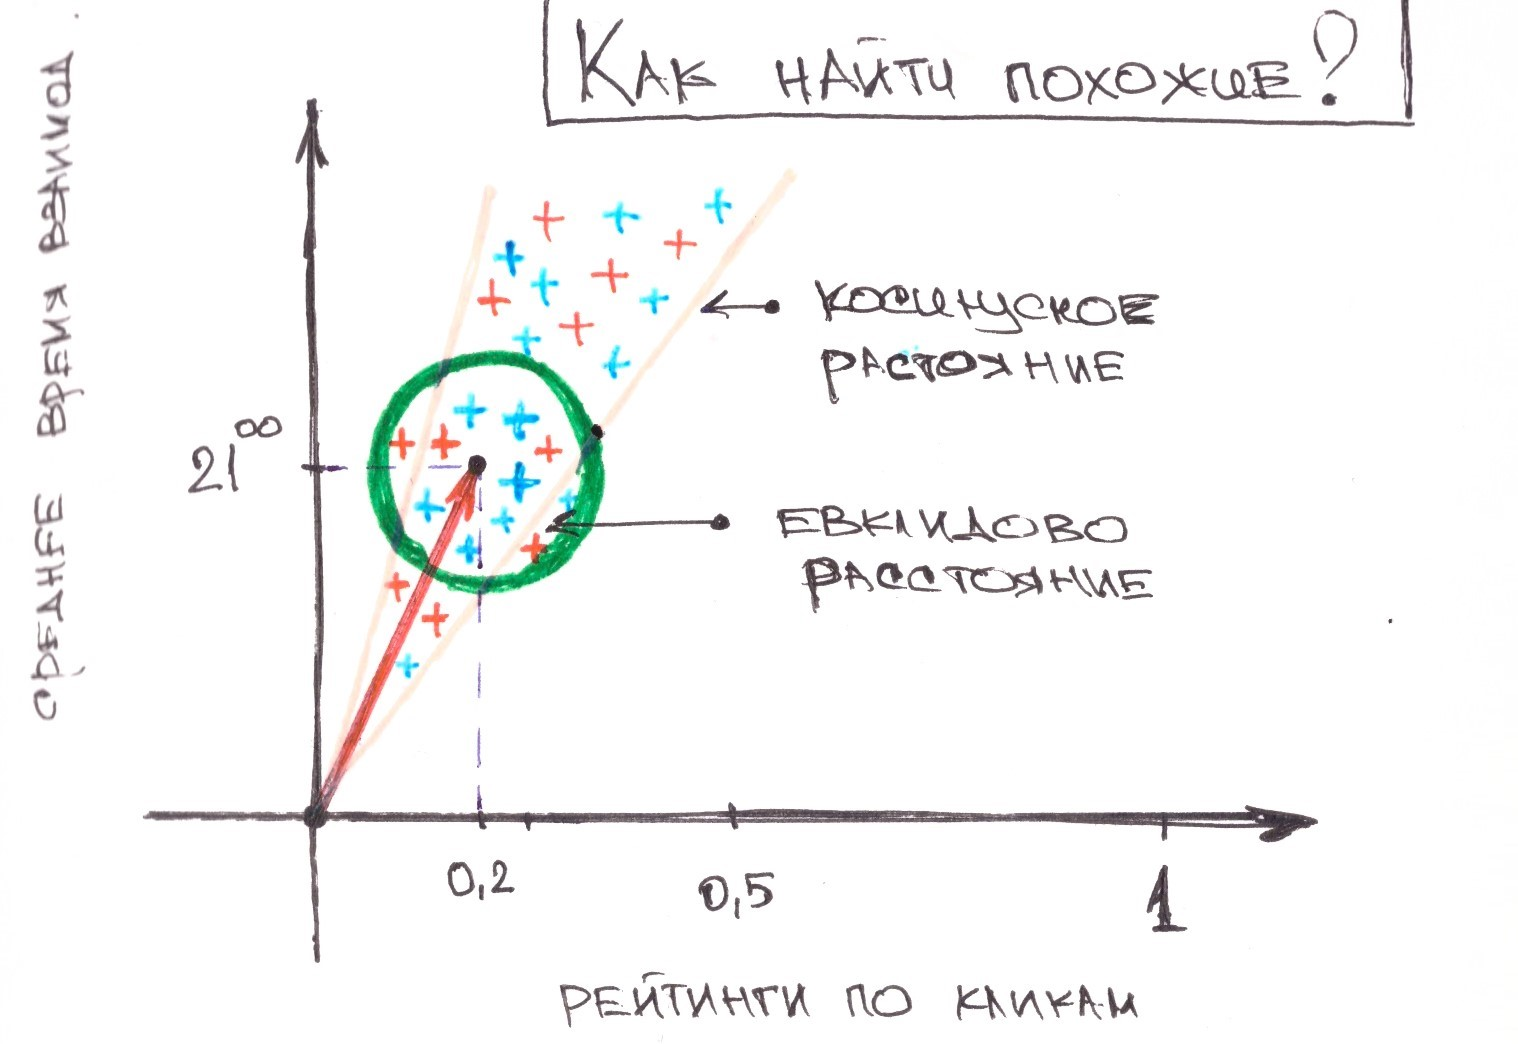

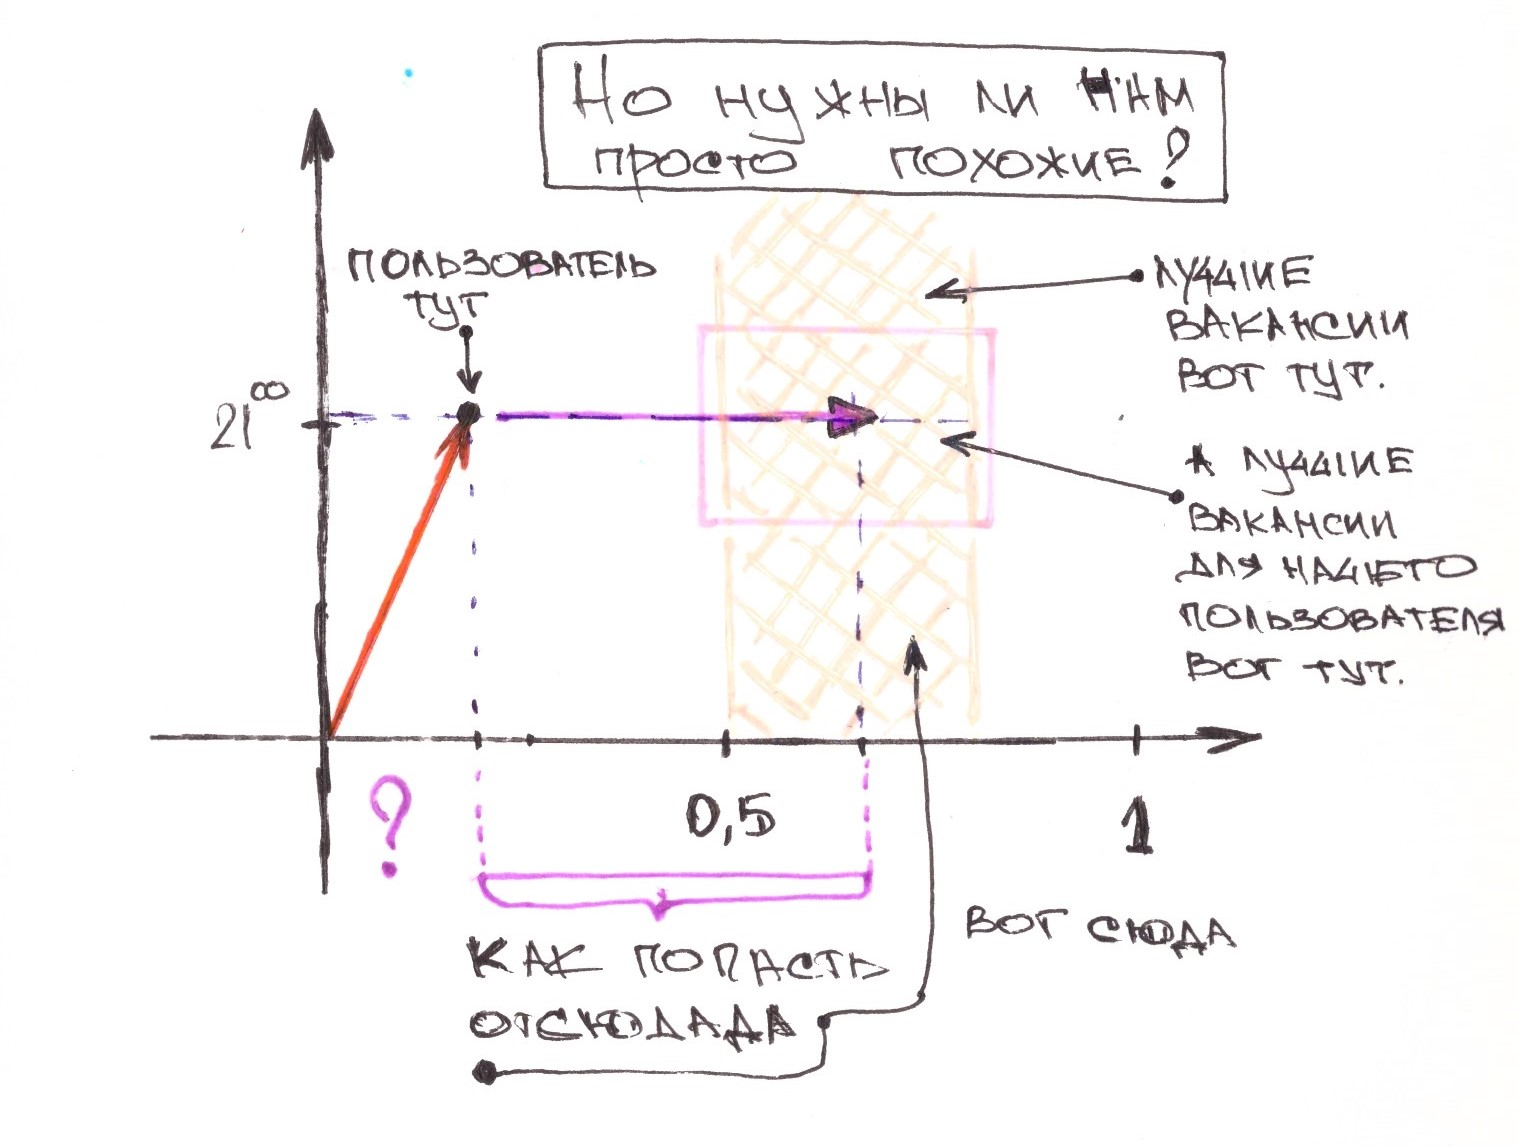

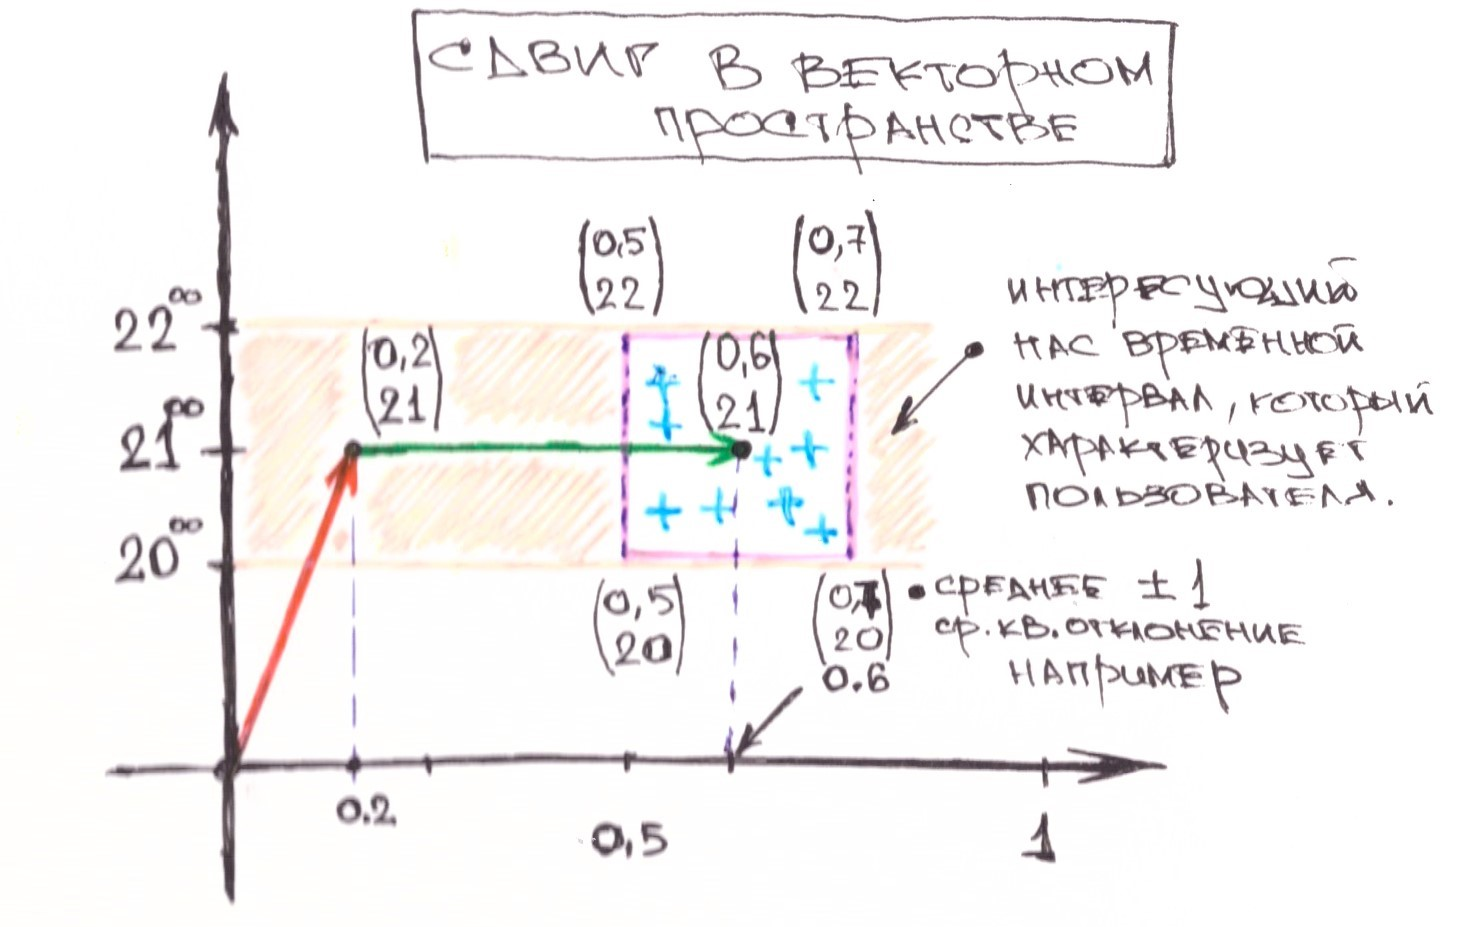

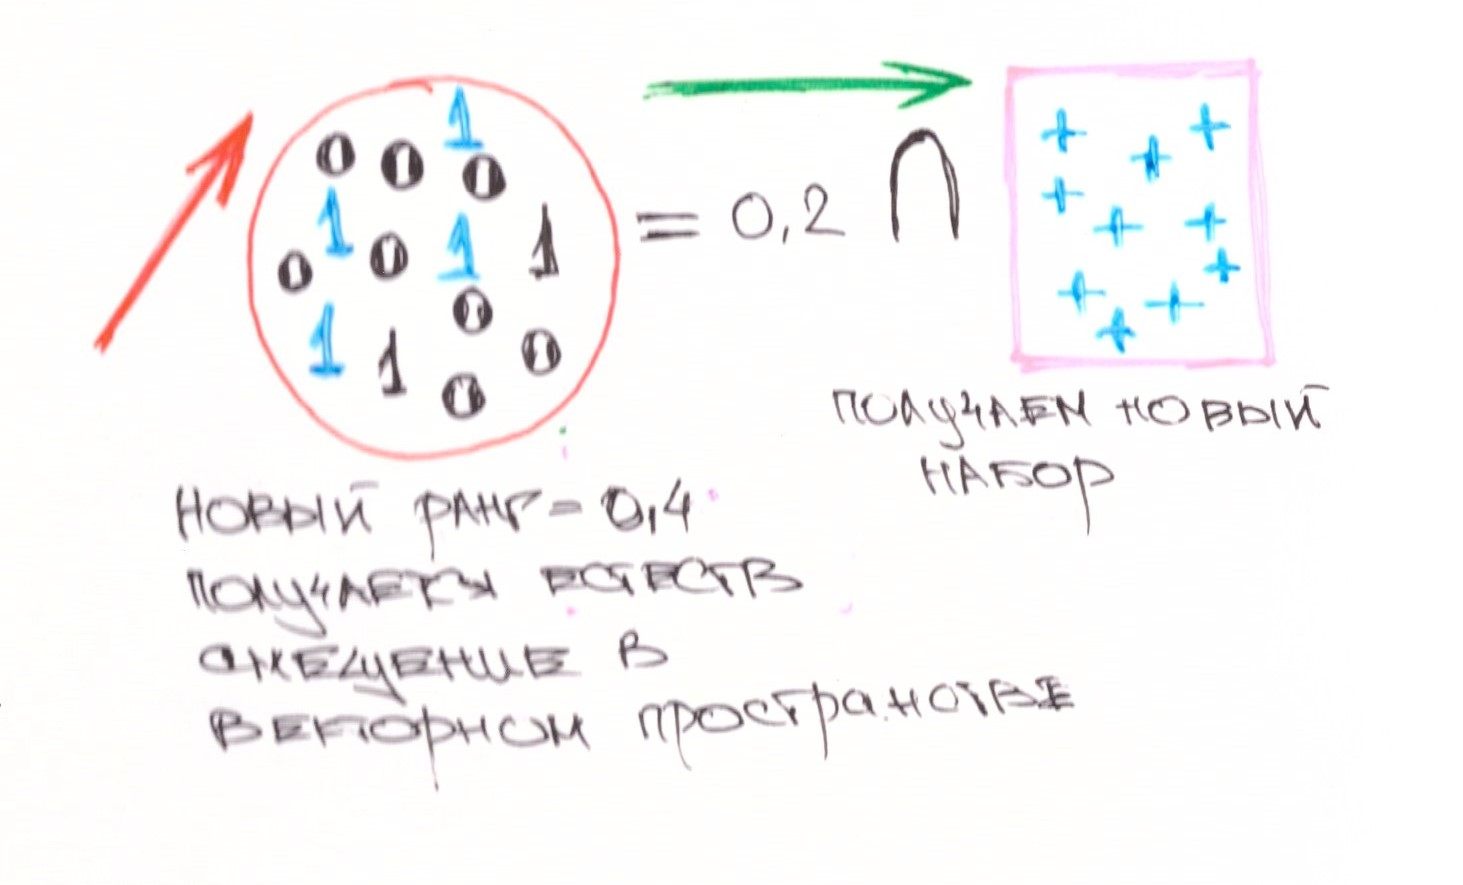

In [ ]:
exclude_vacancies = list(set(df['vacancy_id_']))
exclude_cookie = list(set(df['vacancy_id_']))


In [ ]:
target_cook = '000cd76cd33f43d4a1ac1d16d10f8bf7'

In [ ]:
list_of_seen = list(set(df.loc[df.cookie_id == target_cook, 'vacancy_id_']))
print(len(list_of_seen))
print(list_of_seen)
list_of_not_seen = exclude_vacancies
for i in list_of_seen:
    if i in exclude_vacancies:
        list_of_not_seen.remove(i)
print(len(list_of_not_seen))


15
[258338, 189795, 234212, 238883, 189576, 243946, 101099, 236349, 258095, 156688, 104082, 182454, 134006, 210427, 202877]
160152


In [ ]:
print(len(list_of_not_seen))
print(list_of_not_seen[:10])

160152
[100001, 100002, 100003, 100004, 100005, 100006, 100007, 100008, 100009, 100010]


In [ ]:
features = ['click_contacts',	'click_favorite',	'click_phone',	'click_response', 'preview_click_phone',	'preview_click_response']

In [ ]:
df['Good'] = df.apply(lambda row:'Good' if row['event_type'] in features else 'Bad', axis=1)

In [ ]:
df['Register'] = df.apply(lambda row:'не зарегистрирован' if row['user_id'] == None else 'зарегистрирован', axis=1)

KeyboardInterrupt: 

In [ ]:
df.head()

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register
0,2022-08-01,1659323026,129850,97990f1a021d4be19aa3f955b7eacab4,951f53de61764ea0b51317200a0dbbfc,show_vacancy,Bad,зарегистрирован
1,2022-08-01,1659377255,108347,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован
2,2022-08-01,1659376695,109069,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован
3,2022-08-01,1659376722,171425,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован
4,2022-08-01,1659374929,252384,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован


In [ ]:
df_event_type = pd.get_dummies(df['event_type'])
df = pd.concat([df, df_event_type], axis=1)

In [ ]:
df.head()

,event_date,event_timestamp,vacancy_id_,cookie_id,user_id,event_type,Good,Register,click_contacts,click_favorite,click_phone,click_response,preview_click_contacts,preview_click_favorite,preview_click_phone,preview_click_response,preview_click_vacancy,show_vacancy
0,2022-08-01,1659323026,129850,97990f1a021d4be19aa3f955b7eacab4,951f53de61764ea0b51317200a0dbbfc,show_vacancy,Bad,зарегистрирован,0,0,0,0,0,0,0,0,0,1
1,2022-08-01,1659377255,108347,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован,0,0,0,0,0,0,0,0,0,1
2,2022-08-01,1659376695,109069,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован,0,0,0,0,0,0,0,0,0,1
3,2022-08-01,1659376722,171425,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован,0,0,0,0,0,0,0,0,0,1
4,2022-08-01,1659374929,252384,03bf8c511fa949c79845a5d81b09aa1d,f5a2326a17484330aa8cb4019f1b1960,show_vacancy,Bad,зарегистрирован,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_good_type = pd.get_dummies(df['Good'])
df = pd.concat([df, df_good_type], axis=1)

In [ ]:
df_good_type = pd.get_dummies(df['Register'])
df = pd.concat([df, df_good_type], axis=1)

In [ ]:
df.columns

Index(['event_date', 'event_timestamp', 'vacancy_id_', 'cookie_id', 'user_id',
       'event_type', 'Good', 'Register', 'click_contacts', 'click_favorite',
       'click_phone', 'click_response', 'preview_click_contacts',
       'preview_click_favorite', 'preview_click_phone',
       'preview_click_response', 'preview_click_vacancy', 'show_vacancy',
       'Bad', 'Good', 'зарегистрирован', 'не зарегистрирован'],
      dtype='object')

In [ ]:
features2 = ['click_contacts', 'click_favorite',
       'click_phone', 'click_response', 'preview_click_contacts',
       'preview_click_favorite', 'preview_click_phone',
       'preview_click_response', 'preview_click_vacancy', 'show_vacancy',
       'Bad', 'Good', 'зарегистрирован', 'не зарегистрирован']

In [ ]:
df_vectorsX = df.groupby('vacancy_id_')[features2].mean()

C:\Users\pavel\AppData\Local\Temp\ipykernel_10696\2272735458.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_vectorsX = df.groupby('vacancy_id_')[features2].mean()


In [ ]:
df_vectorsX

,click_contacts,click_favorite,click_phone,click_response,preview_click_contacts,preview_click_favorite,preview_click_phone,preview_click_response,preview_click_vacancy,show_vacancy,Bad,Good,зарегистрирован,не зарегистрирован
vacancy_id_,,,,,,,,,,,,,,
100001,0.040816,0.020408,0.000000,0.020408,0.000000,0.020408,0.0,0.040816,0.387755,0.469388,0.877551,0.122449,0.816327,0.183673
100002,0.048406,0.015348,0.014168,0.029516,0.009445,0.001181,0.0,0.007084,0.364817,0.510035,0.885478,0.114522,0.700118,0.299882
100003,0.000000,0.016667,0.000000,0.016667,0.000000,0.000000,0.0,0.016667,0.483333,0.466667,0.950000,0.050000,0.466667,0.533333
100004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.250000,0.750000,1.000000,0.000000,0.250000,0.750000
100005,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.0,0.000000,0.333333,0.555556,1.000000,0.000000,0.777778,0.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260163,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.500000,0.500000,1.000000,0.000000,0.833333,0.166667
260164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
260165,0.000000,0.029412,0.000000,0.039216,0.009804,0.019608,0.0,0.000000,0.382353,0.519608,0.931373,0.068627,0.794118,0.205882


In [ ]:
df_vectorsTh = df.groupby('cookie_id')[features2].mean()

C:\Users\pavel\AppData\Local\Temp\ipykernel_10696\477839056.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_vectorsTh = df.groupby('cookie_id')[features2].mean()


In [ ]:
df_vectorsTh

,click_contacts,click_favorite,click_phone,click_response,preview_click_contacts,preview_click_favorite,preview_click_phone,preview_click_response,preview_click_vacancy,show_vacancy,Bad,Good,зарегистрирован,не зарегистрирован
cookie_id,,,,,,,,,,,,,,
0000c4548c3944c08972bbdc1fa4eb85,0.000000,0.066667,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.466667,0.466667,0.933333,0.066667,1.000000,0.000000
0000d7508334414ca792c5ff66eb8c14,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.500000,0.500000,1.000000,0.000000,0.000000,1.000000
0000e63f423542fe8090575b611cea4d,0.000000,0.096774,0.0000,0.161290,0.000000,0.0,0.0,0.000000,0.225806,0.516129,0.741935,0.258065,1.000000,0.000000
00013bf3e58244b48d4dbdf43543c30c,0.000000,0.000000,0.0000,0.090909,0.000000,0.0,0.0,0.090909,0.181818,0.636364,0.818182,0.181818,0.000000,1.000000
00015019b0594984afc3fd9fa9557490,0.000000,0.098765,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.345679,0.555556,0.901235,0.098765,0.938272,0.061728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffff3581b7e7405db25fac5c5dd1bff9,0.000000,0.000000,0.0000,0.066667,0.000000,0.0,0.0,0.066667,0.400000,0.466667,0.866667,0.133333,0.400000,0.600000
ffff42fe199b46d59ce38bde9c95b148,0.012500,0.000000,0.0125,0.000000,0.000000,0.0,0.0,0.000000,0.387500,0.587500,0.975000,0.025000,0.000000,1.000000
ffff8283d29644e69ad6d08cc3ca7fb7,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.285714,0.714286,1.000000,0.000000,1.000000,0.000000


---